In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import sourses.paths as path

## Global parameters

In [2]:
train_path = path.train_path
test_path = path.test_path

batch_size = 32
img_height = 180
img_width = 180

epochs = 10

## Loading data from local
- The train data is split into training data and valitation data

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [5]:
class_names = train_ds.class_names
num_classes = len(class_names)

## Building the model

In [6]:
model_1 = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

## Training the model

In [12]:
training = model_1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
981/981 [==============================] - 444s 451ms/step - loss: 1.5112 - accuracy: 0.5937 - val_loss: 0.2157 - val_accuracy: 0.9454
Epoch 2/10
981/981 [==============================] - 429s 437ms/step - loss: 0.1812 - accuracy: 0.9485 - val_loss: 0.1857 - val_accuracy: 0.9563
Epoch 3/10
981/981 [==============================] - 436s 445ms/step - loss: 0.1000 - accuracy: 0.9726 - val_loss: 0.1432 - val_accuracy: 0.9657
Epoch 4/10
981/981 [==============================] - 437s 445ms/step - loss: 0.0680 - accuracy: 0.9803 - val_loss: 0.1385 - val_accuracy: 0.9696
Epoch 5/10
981/981 [==============================] - 427s 435ms/step - loss: 0.0541 - accuracy: 0.9846 - val_loss: 0.2266 - val_accuracy: 0.9549
Epoch 6/10
981/981 [==============================] - 427s 435ms/step - loss: 0.0389 - accuracy: 0.9891 - val_loss: 0.1581 - val_accuracy: 0.9723
Epoch 7/10
981/981 [==============================] - 408s 416ms/step - loss: 0.0438 - accuracy: 0.9876 - val_loss: 0.1801 -

## Evaluating its performance

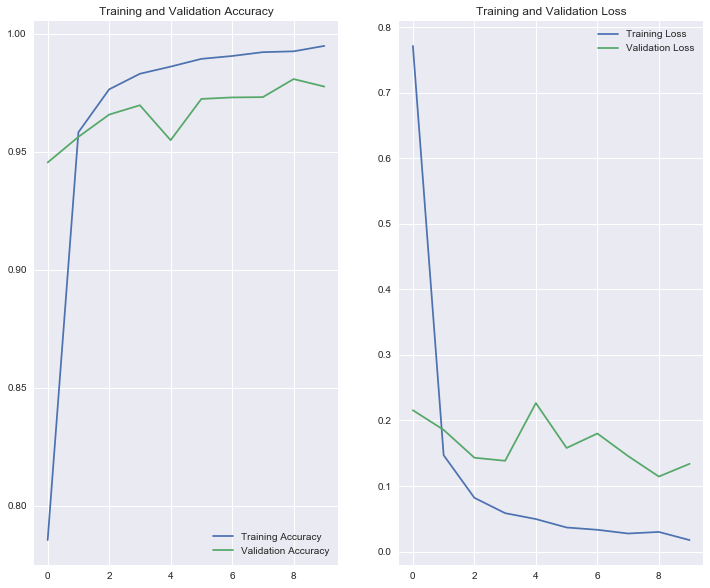

In [20]:
plt.style.use('seaborn')

acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

loss = training.history['loss']
val_loss = training.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('outputs/charts/model_1.png')
plt.show()

## Saving the model

In [21]:
# Save the entire model as a SavedModel.
model_1.save('outputs/models/model_')

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model_1.save('outputs/models/model_1.h5')

INFO:tensorflow:Assets written to: outputs/models/model_/assets
